In [145]:
%matplotlib inline
import numpy as np
import pandas as pd
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import IsolationForest

In [136]:
# data_fid_npy = "../data/KeplerSampleWErr.npy"
# data_fid_csv = "../data/kepDenselcvs.csv"

# def get_index_data(df, z):
#     z_index_data = df[df['index'] == z][['observation_time', 'g_flux']]
#     t = z_index_data['observation_time'].to_list()
#     flux = z_index_data['g_flux'].to_list()
#     frequency, power = LombScargle(t, flux).autopower()
#     return t, flux, frequency, power

# def plot_lightcurve(df, object_index):
#     fig, (ax1, ax2) = plt.subplots(2, 1)
#     fig.set_size_inches(12, 9)
#     fig.subplots_adjust(hspace=0.5)
    
#     if isinstance(object_index, list):
#         for z in object_index:
#             t, flux, frequency, power = get_index_data(df, z)
#             ax1.plot(t, flux)
#             ax2.loglog(frequency, power)
#     else:
#         t, flux, frequency, power = get_index_data(df, object_index)
#         ax1.plot(t, flux)
#         ax2.loglog(frequency, power)

#     ax1.set_xlabel('Observation Time')
#     ax1.set_ylabel('Flux')
#     ax1.grid(True)
    
#     ax2.set_xlabel('Frequency [1/days]')
#     ax2.set_ylabel('Power')
#     ax2.grid(True)

#     plt.show()
    
# def create_feature(df, object_index):
#     t, flux, frequency, power = get_index_data(df, object_index)
#     feature = np.array(list(flux) + list(power))
#     return feature
    
# def get_stats(df):
#     print_chunk = 10000; counter = 0;
#     max_index = df['index'].max()
#     ret = {}
#     for i in range(max_index):
#         t, flux, frequency, power = get_index_data(df, i)
#         ave_flux = np.mean(flux)
#         ave_power = np.mean(power)
#         feature = list(flux) + list(power)
#         feature = np.array(feature).reshape(-1, 1)
#         if_model = IsolationForest().fit(feature)
#         if_score = if_model.decision_function(feature)
#         ret[i] = {"ave_flux": ave_flux, "ave_power": ave_power, "if_score": if_score}
#         if counter % print_chunk == 0:
#             print(f"{counter} fields done")
#         counter += 1
#     return ret

# def import_numpy_fid(numpy_fid):
#     data_array = np.load(data_fid, allow_pickle=True)
#     return data_array

# def read_data(data_fid):
#     if 'csv' in data_fid:
#         return pd.read_csv(data_fid)
#     else:
#         print('whomp whomp')

In [137]:
data_df = read_data(data_fid_csv)
display(data_df)

,Unnamed: 0,observation_time,g_flux,g_flux_error,index
0,0,1472.117779,1.004641,0.000063,0
1,1,1472.138212,1.004592,0.000063,0
2,2,1472.158645,1.004701,0.000063,0
3,3,1472.179078,1.004665,0.000063,0
4,4,1472.199511,1.004701,0.000063,0
...,...,...,...,...,...
249995,95,1474.099308,0.987160,0.000021,2499
249996,96,1474.119741,0.987187,0.000021,2499
249997,97,1474.140174,0.987207,0.000021,2499
249998,98,1474.160607,0.987271,0.000021,2499


In [138]:
data_stats = get_stats(data_df)

0 fields done


In [140]:
data_stats[0].keys()

dict_keys(['ave_flux', 'ave_power', 'if_score'])

In [141]:
ave_fluxes = []; ave_powers = []; if_score = [];
for d in data_stats.keys():
    ave_fluxes.append(data_stats[d]['ave_flux'])
    ave_powers.append(data_stats[d]['ave_power'])
    if_score.append(data_stats[d]['if_score'])

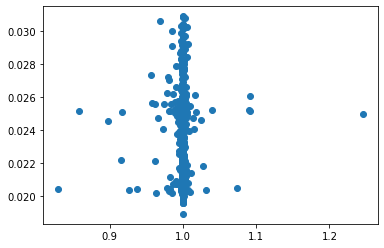

In [142]:
plt.scatter(ave_fluxes, ave_powers)

/opt/conda/lib/python3.8/site-packages/numpy/ma/core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


ValueError: setting an array element with a sequence.

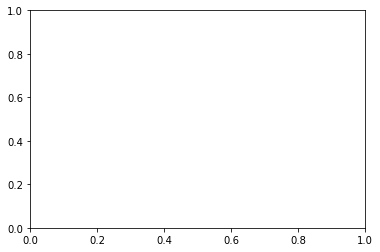

In [143]:
plt.scatter(ave_fluxes, if_score)

In [144]:
if_score

[array([-0.1079726 , -0.11930987, -0.11410192, ...,  0.11026461,
         0.09634345,  0.09645   ]),
 array([-0.17304485, -0.18840684, -0.15688914, ...,  0.07096368,
         0.06693663,  0.0458462 ]),
 array([-0.17835435, -0.14207749, -0.25213245, ...,  0.02256662,
         0.00320133, -0.00259623]),
 array([-0.11200438, -0.12964588, -0.17466407, ...,  0.09162256,
         0.03512213,  0.0865487 ]),
 array([-0.2183124 , -0.19771545, -0.20674258, ...,  0.09128778,
         0.09255738,  0.0813688 ]),
 array([-0.16593034, -0.17272314, -0.26289526, ...,  0.05580588,
         0.06267778,  0.08707552]),
 array([-0.2215628 , -0.269635  , -0.25980455, ..., -0.03833191,
        -0.00934638,  0.04378706]),
 array([-0.12841014, -0.13582126, -0.13004141, ...,  0.01966955,
         0.02271732,  0.05982627]),
 array([-0.10908225, -0.109907  , -0.21278618, ...,  0.04433547,
         0.08836643,  0.10302085]),
 array([-0.15706837, -0.21935725, -0.19462794, ...,  0.09567339,
         0.09118016,  0.09

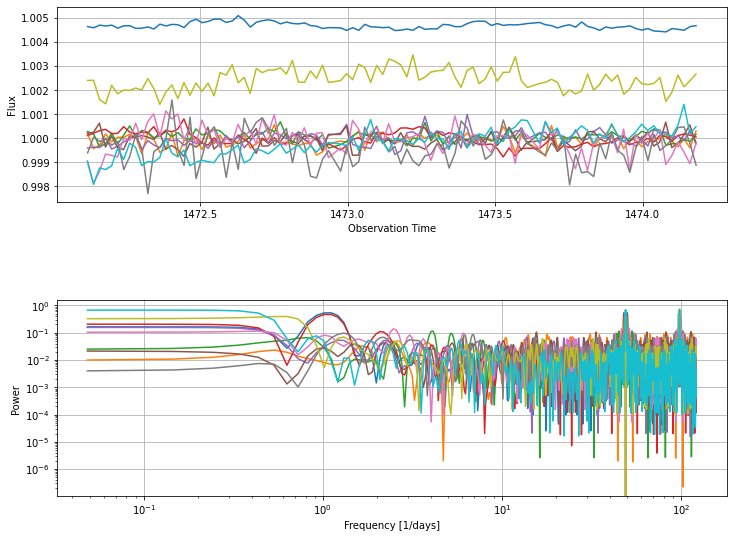

In [77]:
plot_lightcurve(data_df, [x for x in range(10)])

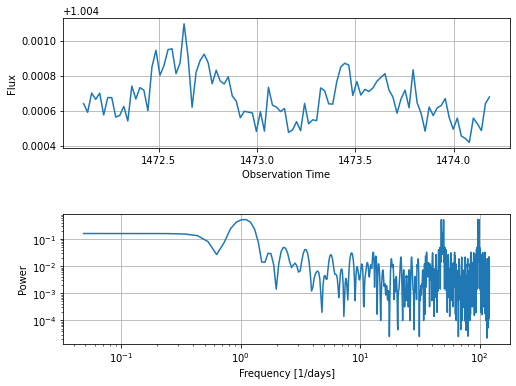

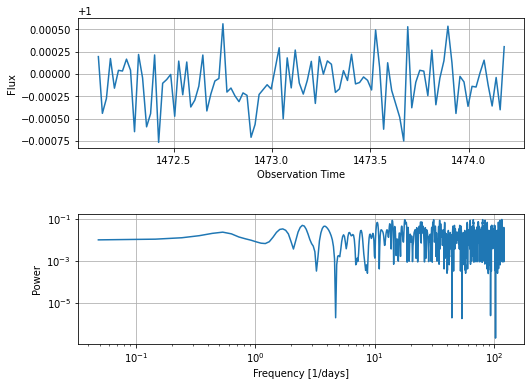

In [61]:
for i in range(2):
    plot_lightcurve(data_df, i)